In [561]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as  plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Reshape

In [563]:
input_df = pd.read_csv("../../data/csv_files/df_ph1.csv")
input_df.shape

(7748, 10)

In [565]:
first_range = ["2023-07-28 05:00:00", "2023-08-31 22:00:00"]
second_range = ["2023-10-18 16:00:00", "2024-01-01 01:00:00"]
third_range = ["2024-01-24 14:06:00", "2024-06-13 01:00:00"]
time_ranges = [first_range, second_range, third_range]

In [567]:
conditions = [((input_df['dt'] >= start) & (input_df['dt'] < end)) for start, end in time_ranges]
combined_condition = conditions[0]
for condition in conditions[1:]:
    combined_condition |= condition

new_df = input_df[combined_condition]
new_df.shape

(6022, 10)

In [569]:
stations_name = list(input_df.columns)
stations_name.remove("dt")

index_name = {}
for i, name in enumerate(stations_name):
    index_name[i] = name
index_name

{0: 'FEX_004',
 1: 'FSB_095DR',
 2: 'FSB_078',
 3: 'FSB_126',
 4: 'FSB_130D',
 5: 'FPZ_06A',
 6: 'FSB_079',
 7: 'FPZ_04A',
 8: 'FSB_097D'}

In [571]:
new_df.isna().sum()

dt             0
FEX_004       33
FSB_095DR     65
FSB_078       32
FSB_126      907
FSB_130D     259
FPZ_06A       36
FSB_079       31
FPZ_04A      121
FSB_097D     198
dtype: int64

In [573]:
input_df = new_df.interpolate(method="linear")

In [575]:
input_df.isna().sum()

dt           0
FEX_004      0
FSB_095DR    0
FSB_078      0
FSB_126      0
FSB_130D     0
FPZ_06A      0
FSB_079      0
FPZ_04A      0
FSB_097D     0
dtype: int64

In [577]:
datetime = input_df['dt']
df = input_df[2:]
datetime = df['dt']
df = df.drop(columns = ['dt'])
df.shape

(6020, 9)

In [579]:
arr = df.values

In [581]:
reshaped_arr = arr.reshape((6020, 9, 1))
reshaped_arr.shape

(6020, 9, 1)

In [583]:
def create_4d_array(array, window_size, overlap):
    step = window_size - overlap
    num_rows, num_columns, depth = array.shape
    num_windows = (num_rows - window_size) // step + 1

    array_4d = np.zeros((num_windows, window_size, num_columns, depth))

    count = 0
    for i in range(0, num_windows, step):
        array_4d[count] = array[i:i+window_size]
        count += 1

    return array_4d

In [585]:
train_data = reshaped_arr[:5000]
test_data = reshaped_arr[5000:]

train_data.shape, test_data.shape

((5000, 9, 1), (1020, 9, 1))

In [587]:
X_train = train_data
X_train.shape

(5000, 9, 1)

In [589]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(9, 1)),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    
    Flatten(),    
    Dense(64, activation='relu'),
    Dense(9 * 1 , activation='linear'),
    Reshape((9, 1))
])

model.compile(optimizer='adam', loss='mean_squared_error') 

/Users/sandeshgnawali/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [591]:
model.fit(X_train, X_train, epochs = 100, batch_size = 64)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 5.9392 
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.0283
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0267
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0252
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.0233
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.0208
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.0184
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0145
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.0103
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.0078
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0066
Epoch 12/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.0060
Epoch 13/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0057
Epoch 14/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0052
Epoch 15/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s

In [592]:
X_test = test_data

In [543]:
X_test.shape

(1020, 9, 1)

In [545]:
model.evaluate(X_train, X_train)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.0011


0.0011214183177798986

In [547]:
y_pred = model.predict(X_train)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


In [549]:
y_pred_reshaped = y_pred.reshape((-1, 9))
y_pred_reshaped.shape

(5000, 9)

In [551]:
predicted_df = pd.DataFrame(y_pred_reshaped)

In [553]:
predicted_df.rename(columns = index_name, inplace = True)

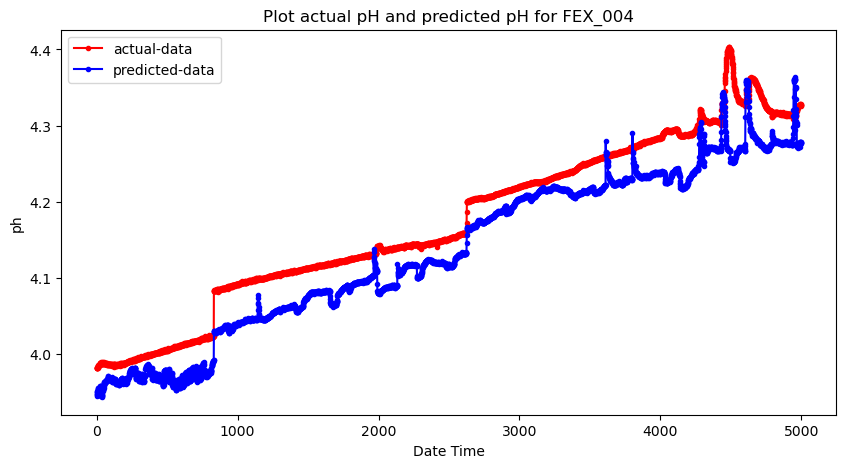

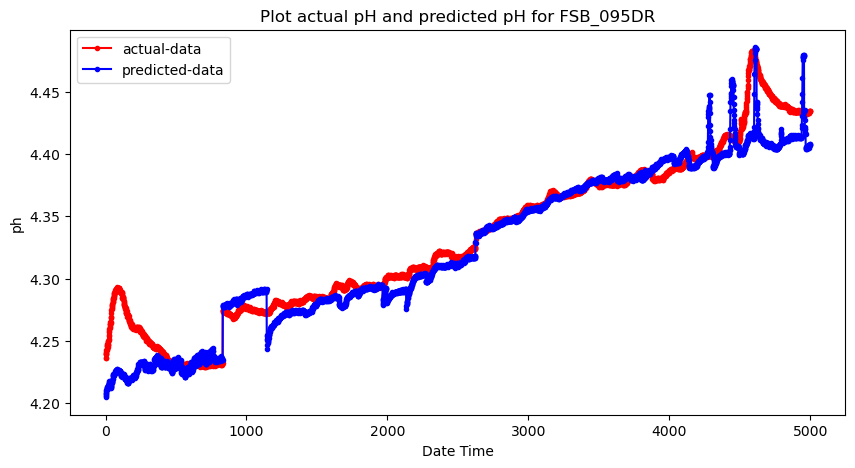

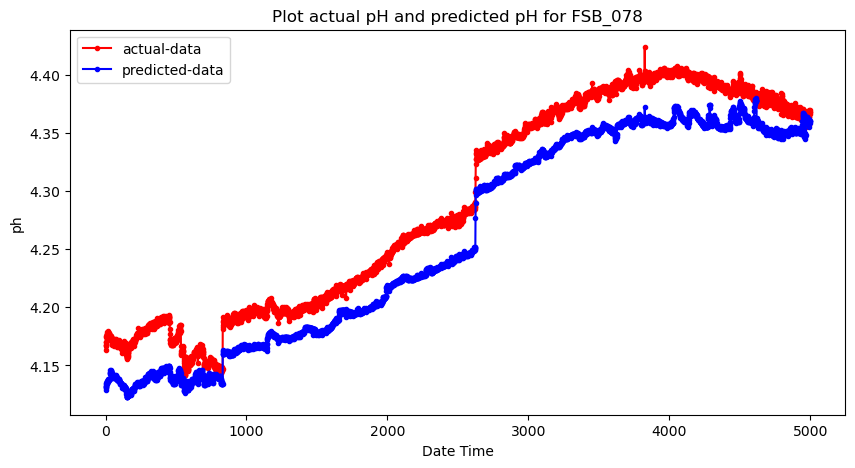

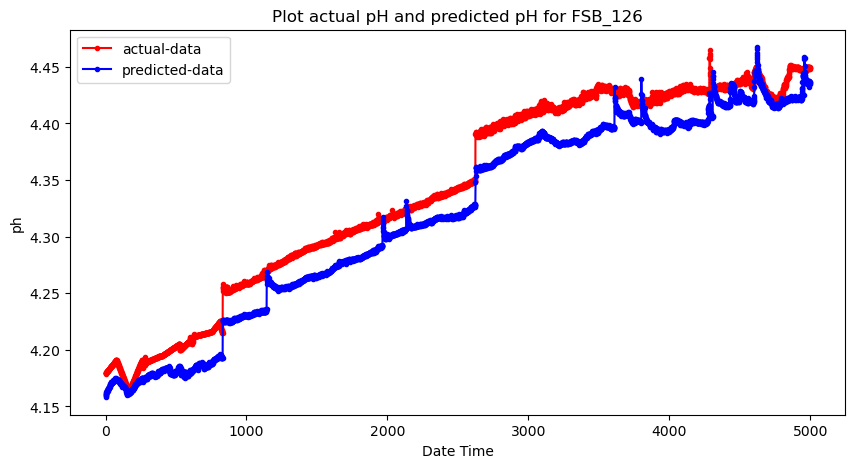

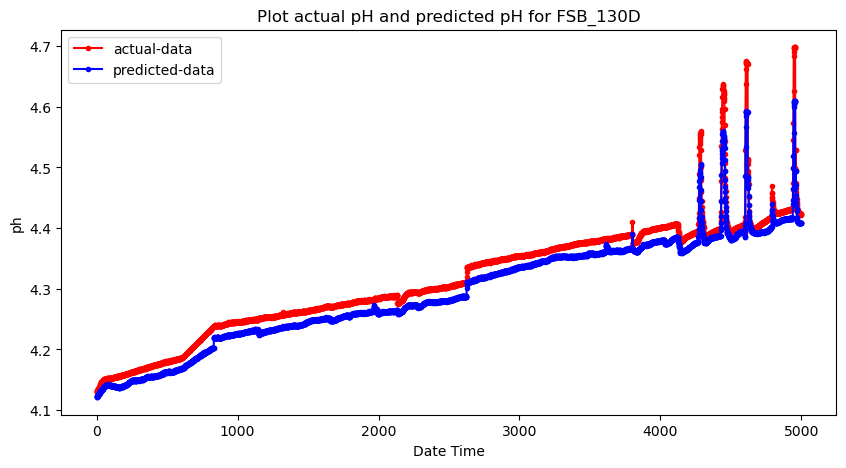

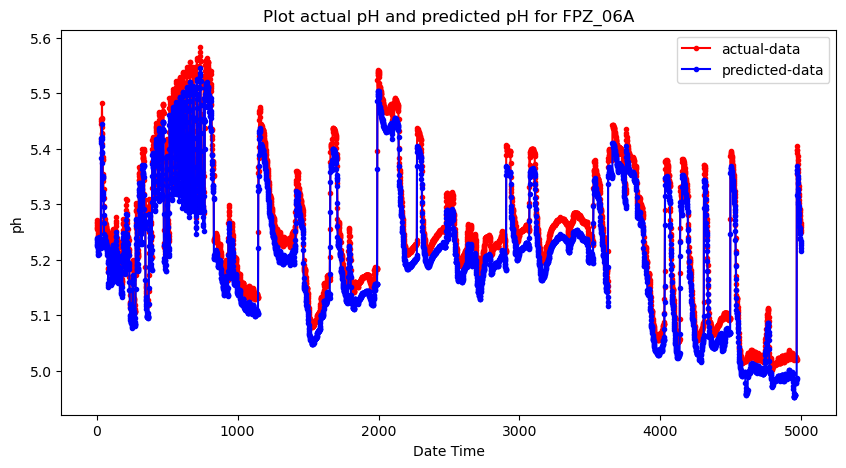

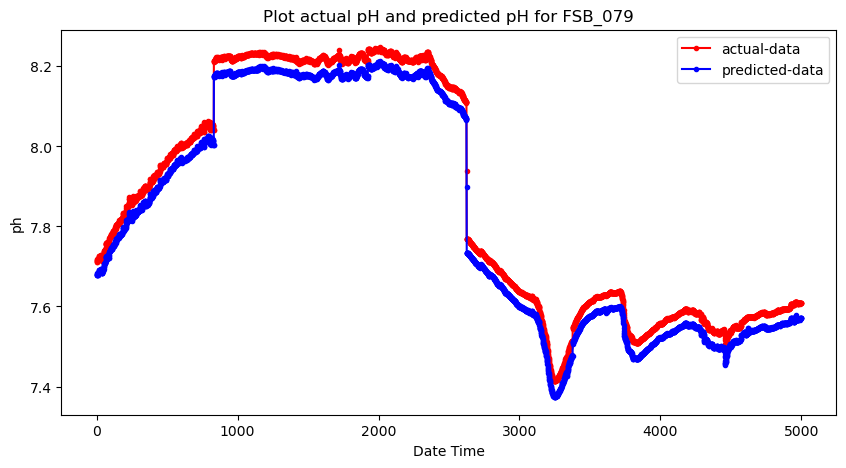

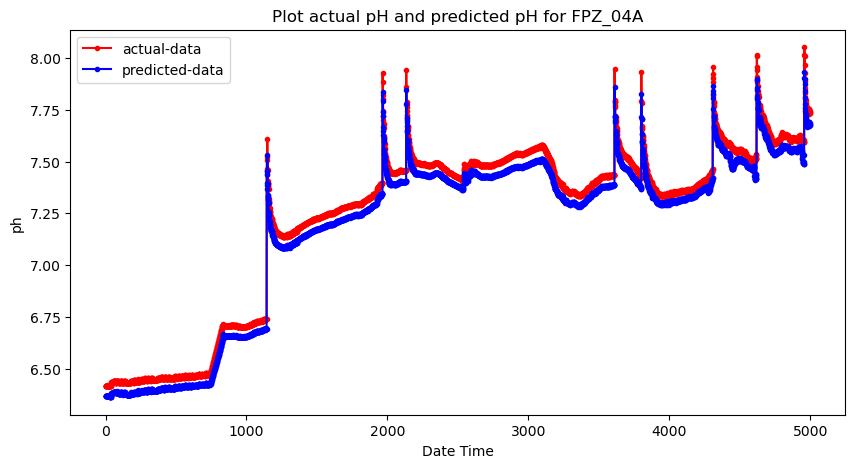

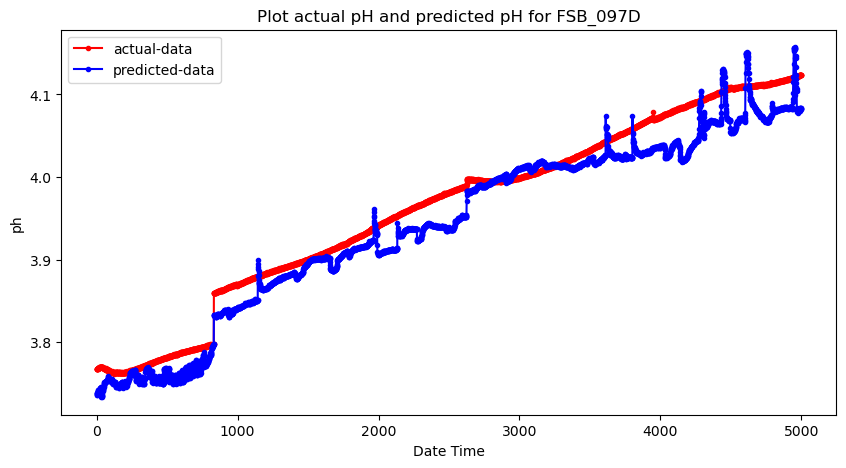

In [559]:

for key, index in index_name.items():
# index = index_name[0]
    plt.figure(figsize=(10, 5))
    plt.plot( train_data[:, key], marker='.', color="red", label="actual-data")
    plt.plot( predicted_df[index], marker='.', color="blue", label = "predicted-data")


    plt.xlabel('Date Time')
    plt.ylabel('ph')
    plt.title(f'Plot actual pH and predicted pH for {index}')
    plt.legend()
    plt.show()